In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = data.iloc[:,:13]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y = data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

## Hyperparameter Search

In [6]:
model = KNeighborsClassifier()
param = {'n_neighbors' : [10], 
         'weights' : ['uniform', 'distance'], 
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
         'leaf_size' : range(1,50),
         'p' : [1,2]
        }

clf = GridSearchCV(model, param, scoring = ['accuracy'], refit=False, n_jobs = -1)
best_model = clf.fit(X,y)

In [7]:
# print out the best hyperparameters for fitting k nearest neighbors classifier
best_model.cv_results_['params'][np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'algorithm': 'ball_tree',
 'leaf_size': 16,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [8]:
# use a 5-fold cross validation to get the average accuracy, f1 score, and area under roc
kf = KFold(n_splits = 5, shuffle = True)
accu_list = []
f1_list = []
roc_list = []

for train_ind, test_ind in kf.split(X): 
    X_train, X_test = X.iloc[train_ind,:], X.iloc[test_ind,:]
    y_train, y_test = y[train_ind], y[test_ind]
    
    for i in range(1,50): 
        model = KNeighborsClassifier(n_neighbors = i, algorithm = 'ball_tree', leaf_size = 16, p = 1, weights = 'distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accu_list.append(accuracy_score(y_pred, y_test))
        f1_list.append(f1_score(y_pred, y_test))
        roc_list.append(roc_auc_score(y_pred, y_test))

In [9]:
length = len(accu_list)
accu_list1 = accu_list[:int(length/5)]
accu_list2 = accu_list[int(length/5):int(length/5)*2]
accu_list3 = accu_list[int(length/5)*2:int(length/5)*3]
accu_list4 = accu_list[int(length/5)*3:int(length/5)*4]
accu_list5 = accu_list[int(length/5)*4:]
accu_list = []
for i in range(int(length/5)):
    accu_list.append(np.average([accu_list1[i],accu_list2[i],accu_list3[i],accu_list4[i],accu_list5[i]]))
    
accu_std = []
for i in range(int(length/5)):
    accu_std.append(np.std([accu_list1[i],accu_list2[i],accu_list3[i],accu_list4[i],accu_list5[i]]))

In [10]:
length = len(f1_list)
f1_list1 = f1_list[:int(length/5)]
f1_list2 = f1_list[int(length/5):int(length/5)*2]
f1_list3 = f1_list[int(length/5)*2:int(length/5)*3]
f1_list4 = f1_list[int(length/5)*3:int(length/5)*4]
f1_list5 = f1_list[int(length/5)*4:]
f1_list = []
for i in range(int(length/5)):
    f1_list.append(np.average([f1_list1[i],f1_list2[i],f1_list3[i],f1_list4[i],f1_list5[i]]))

In [11]:
length = len(roc_list)
roc_list1 = roc_list[:int(length/5)]
roc_list2 = roc_list[int(length/5):int(length/5)*2]
roc_list3 = roc_list[int(length/5)*2:int(length/5)*3]
roc_list4 = roc_list[int(length/5)*3:int(length/5)*4]
roc_list5 = roc_list[int(length/5)*4:]
roc_list = []
for i in range(int(length/5)):
    roc_list.append(np.average([roc_list1[i],roc_list2[i],roc_list3[i],roc_list4[i],roc_list5[i]]))

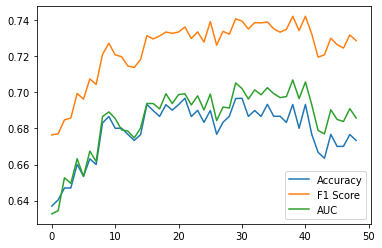

In [12]:
plt.plot(accu_list, label = 'Accuracy') 
plt.plot(f1_list, label = 'F1 Score') 
plt.plot(roc_list, label = 'AUC') 
plt.legend() 
plt.show() 

In [13]:
overall_score = np.array(accu_list) + np.array(f1_list) + np.array(roc_list)

In [14]:
np.argmax(overall_score)

29

Choose k = 24?????

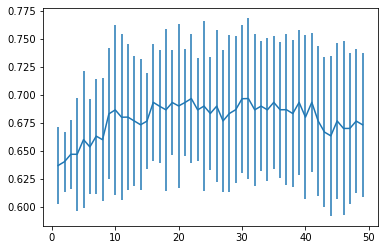

In [16]:
plt.errorbar(range(1,50), accu_list, yerr = accu_std)
plt.show()